In [ ]:
# Sanika Tambekar
# BE IT
# Roll no. 9074
#Assignment 3: b) Animal (DOG and CAT) dataset
#Build the Image Classification Model by dividing model into 4 stages: 
#Loading and preprocessing the image, Defining the model architecture, Training the model, Estimating the model's performance

In [1]:
pip install tensorflow 

In [3]:
pip install keras.models

In [4]:
pip install keras.datasets

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D

In [6]:
x_train = np.loadtxt ('input.csv', delimiter = ',')

In [7]:
y_train = np.loadtxt("labels.csv", delimiter = ",")

x_test = np.loadtxt("input_test.csv", delimiter = ",")
y_test = np.loadtxt("labels_test.csv", delimiter = ",")

In [8]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2000, 30000)
Shape of y_train :  (2000,)
Shape of x_test :  (400, 30000)
Shape of y_test :  (400,)


In [10]:
x_train = x_train.reshape(len(x_train), 100,100,3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100,100,3)
y_test = y_test.reshape(len(x_test), 1)

In [11]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2000, 100, 100, 3)
Shape of y_train :  (2000, 1)
Shape of x_test :  (400, 100, 100, 3)
Shape of y_test :  (400, 1)


In [12]:
# Normalizing the data
x_train = x_train/255
x_test = x_test/255

# After Normalization
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

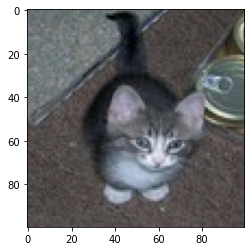

In [18]:
#Displaying random image from dataset

import matplotlib.pyplot as plt
import random

idx = random.randint (0,len(x_train))

plt.imshow(x_train[idx, :])
plt.show()

In [19]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape =(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [20]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 16s 417ms/step - loss: 0.7348 - accuracy: 0.5065
Epoch 2/5
32/32 [==============================] - 13s 400ms/step - loss: 0.6741 - accuracy: 0.6150
Epoch 3/5
32/32 [==============================] - 13s 398ms/step - loss: 0.6386 - accuracy: 0.6470
Epoch 4/5
32/32 [==============================] - 13s 399ms/step - loss: 0.5913 - accuracy: 0.6835
Epoch 5/5
32/32 [==============================] - 13s 391ms/step - loss: 0.5655 - accuracy: 0.7095


In [22]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 2s 53ms/step - loss: 0.5956 - accuracy: 0.6825


[0.5955869555473328, 0.6825000047683716]

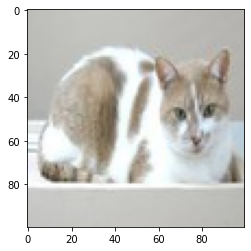

1/1 [==============================] - 0s 356ms/step
It is a  cat


In [24]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))

y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = 'dog'
else:
  pred = 'cat'  

print("It is a ", pred)  